In [1]:
# Retrieve variable df from preparation notebook
%store -r df

In [2]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test
from matplotlib import pyplot as plt
import polars as pl

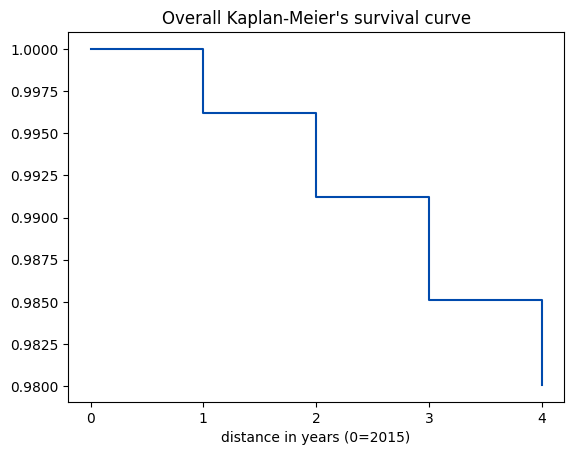

In [3]:
import numpy as np
import matplotlib.pyplot as plt


kmf = KaplanMeierFitter()
kmf.fit(df['distance'], event_observed=df["status"])

kmf.plot(ci_show=False, color = '#004aad')

plt.xlabel("distance in years (0=2015)")
plt.xticks([0, 1, 2, 3, 4])
plt.legend('',frameon=False)

plt.title("Overall Kaplan-Meier's survival curve")
plt.style.use('ggplot');

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         200.07 <0.005    144.32

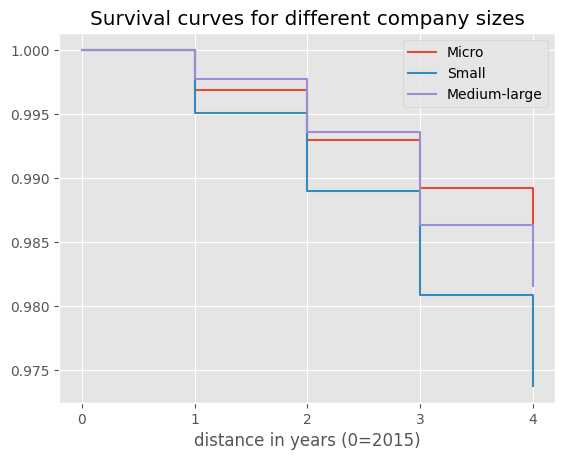

In [4]:
# fit a Kaplan-Meier's for every company size
for size in ('micro', 'small', 'medium-large'):
    filtered = df.filter(pl.col("size") == size)

    kmf.fit(filtered['distance'], event_observed=filtered['status'], label=size.capitalize())
    kmf.plot(ci_show=False)

plt.xlabel("distance in years (0=2015)")
plt.xticks([0, 1, 2, 3, 4])
plt.title("Survival curves for different company sizes")
plt.style.use('ggplot');
result = multivariate_logrank_test(df['distance'], df['size'], df['status'])
result.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          60.21 <0.005     40.78

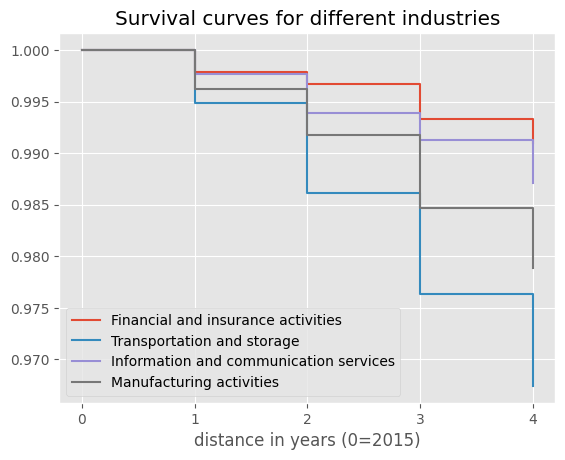

In [5]:
# fit a Kaplan-Meier's for every industry in the list

industries = """ATTIVITÀ FINANZIARIE E ASSICURATIVE
TRASPORTO E MAGAZZINAGGIO
SERVIZI DI INFORMAZIONE E COMUNICAZIONE
ATTIVITÀ MANIFATTURIERE"""

whole_filtered = []

for industry in industries.split('\n'):
    filtered = df.filter(pl.col("ateco_title") == industry)
    if len(whole_filtered) > 0:
        whole_filtered = pl.concat([whole_filtered, filtered])
    else:
        whole_filtered = filtered

    kmf.fit(filtered['distance'], event_observed=filtered['status'], label=industry)
    kmf.plot(ci_show=False)

plt.xlabel("distance in years (0=2015)")
plt.legend(["Financial and insurance activities", "Transportation and storage", "Information and communication services", "Manufacturing activities"])
plt.xticks([0, 1, 2, 3, 4])
plt.title("Survival curves for different industries")
result = multivariate_logrank_test(whole_filtered['distance'], whole_filtered['ateco_title'], whole_filtered['status'])
result.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        1168.77 <0.005    848.51

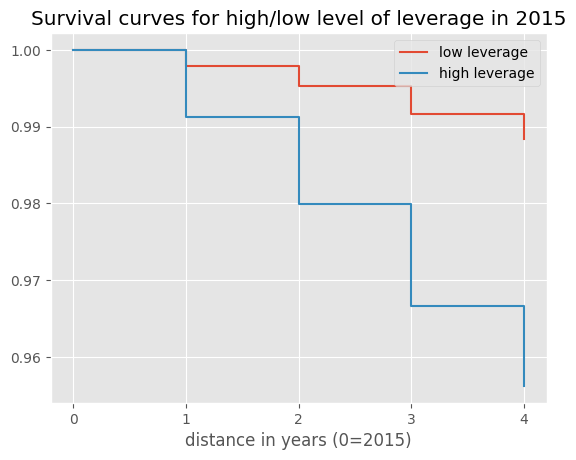

In [9]:
# fit a Kaplan-Meier's for high and low value of levergage based on its mean

filtered_low = df.filter(pl.col("Leverage 2015") < pl.col('Leverage 2015').mean())
kmf.fit(filtered_low['distance'], event_observed=filtered_low['status'], label=f'low leverage')
kmf.plot(ci_show=False)

filtered_high = df.filter(pl.col("Leverage 2015") >= pl.col('Leverage 2015').mean())
kmf.fit(filtered_high['distance'], event_observed=filtered_high['status'], label=f'high leverage')
kmf.plot(ci_show=False)

plt.xlabel("distance in years (0=2015)")
plt.xticks([0, 1, 2, 3, 4])
plt.title("Survival curves for high/low level of leverage in 2015")
result = multivariate_logrank_test(df['distance'], df.select(pl.col("Leverage 2015") >= pl.col('Leverage 2015').mean())['Leverage 2015'], df['status'])
result.print_summary()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cda3dc7f-2383-4ca3-97fb-1b86671fd3dc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>